# Business Centric Insights of Online Hospitality Market Data in the Seatle Area

 # 1. Introduction & Data Gathering
    Abstract: In this project, we will be analyzing a series of data sets provided by Kaggle of AirBnB listings in the Seattle area. Our goal will be to first, forumlate questions based on what information is provided in the dataset. Then we will clean up the data so it can be ultizlied for our ends, finally allowing us to provide insights from the data set into potential answers to our questions.
    
    To begin with, we will download all our data to this Juptyr notebook and proceed to take a look at it in various ways to understand what we could potentially discover. We will take a look at the set's headers, columns and shapes.

In [47]:
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_35fd6d9c8a7d43ee96101400fb522263 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='s9CPbHB5nwJRDCQH2R4M-MUbrhoNCpGTPlS_zWVROG9v',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='calendar.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

calender = pd.read_csv(body)
calender.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
calender.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [3]:
calender.shape

(1393570, 4)

In [4]:

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='listings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

listings = pd.read_csv(body)
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
listings.shape

(3818, 92)

In [7]:

body = client_35fd6d9c8a7d43ee96101400fb522263.get_object(Bucket='udacity9-donotdelete-pr-c5hwtduszw10xt',Key='reviews.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

reviews = pd.read_csv(body)
reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [9]:
reviews.shape

(84849, 6)

 # 2. Inital Thoughts and Question Formulation
     Based on the inital looks through our data, it seems clear that our treasure trove of data is going to be in the listings data set, and as thus we will focus exclusviely on it. For a more complex project and potential expansion, it would be great to add in the reviews data set to run a sentiment analysis on comments to see if there are any connections to other factors, but for now, lacking sentiment analysis tools, we will pass on the reviews data set as well as the calender data set.
     This leaves us with the great deal of columns within the listings data sets, and based on potential relationships within the columns, I have devised the following questions:
     
     1. How does one being a "SuperHost" affect the response and acceptance rates? If one is to act as AirBnB, they should understand what value exists for them in having SuperHosts. Are they intrinsically more valuable? They are, then AirBnB should focus on pleasing them and continuing to encourage them to host. If not, AirBnb will not have to placate demanding hosts, and can focus more on pleasing the consumer rather than the client.
     
     2. What is the relationship between the zipcodes of Seattle and its respective prices? Are there certain areas of the city that are higher priced and AirBnB should focus more so on advertising for, because more people will want to stay there and thus create additional revenues for the company?
     
     3. What is the overall relationship between the different factors of the AirBnb reviewing system? Is there a point in the way they divide up the reviews or do more often than not the reviews fall in line with the average? Assuming higher reviews lead to an increase in the number of times a place is rented out, it is to AirBnb's advantage to inflate the reviews however they can as Netflix has done in the past in order to drive an better perception of the brand. Can we do this here?
     
     These will be the  questions we will be tackling within our journey. In order to move forward now, we will clean through the listings data set to truly see if we have the correct data to come to these conclusions.
     
 # 3. Data Cleaning

In [10]:
#We will purge all the unessecary data columns to add to the easy of working with the data. Columns to be included are:
'''
'id,''number_of_reviews','first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'zipcode', 'market', 'price'
'''

"\n'id,''number_of_reviews','first_review', 'last_review', 'review_scores_rating',\n       'review_scores_accuracy', 'review_scores_cleanliness',\n       'review_scores_checkin', 'review_scores_communication',\n       'review_scores_location', 'review_scores_value',\n        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',\n        'zipcode', 'market', 'price'\n"

In [11]:
listings_clean = listings[['id','number_of_reviews','first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'zipcode', 'market', 'price']]
listings_clean.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96%,100%,f,98119,Seattle,$85.00
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98%,100%,t,98119,Seattle,$150.00
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67%,100%,f,98119,Seattle,$975.00
3,7421966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,98119,Seattle,$100.00
4,278830,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,100%,NaN,f,98119,Seattle,$450.00


In [12]:
# Now, with our data cleaning, we will search for NaN values in our columns of interest
listings_clean.isna().sum()

id                               0
number_of_reviews                0
first_review                   627
last_review                    627
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
zipcode                          7
market                           0
price                            0
dtype: int64

In [13]:
#Let's experiment with purging all NaN values to see if it will drastically reduce our information, or if many of the rows with NaN values in one column overlap with another,
# which is what we should expect by a quick look at row 3 in the above header. We will define our problem by saying that if ~66% of the data survives in a NaN data purge, 
# then we should work with it, as it is leaving enough to resemble the original data set
list_no_nan = listings_clean.dropna(how='any',axis=0)
#Confimring it worked
list_no_nan.isna().sum()

id                             0
number_of_reviews              0
first_review                   0
last_review                    0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
zipcode                        0
market                         0
price                          0
dtype: int64

In [14]:
#Gathering info on the data set after our transformation
list_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 3814
Data columns (total 17 columns):
id                             2669 non-null int64
number_of_reviews              2669 non-null int64
first_review                   2669 non-null object
last_review                    2669 non-null object
review_scores_rating           2669 non-null float64
review_scores_accuracy         2669 non-null float64
review_scores_cleanliness      2669 non-null float64
review_scores_checkin          2669 non-null float64
review_scores_communication    2669 non-null float64
review_scores_location         2669 non-null float64
review_scores_value            2669 non-null float64
host_response_rate             2669 non-null object
host_acceptance_rate           2669 non-null object
host_is_superhost              2669 non-null object
zipcode                        2669 non-null object
market                         2669 non-null object
price                          2669 non-null object
dtyp

In [15]:
print(list_no_nan.shape[0] / (listings.shape[0]))

0.6990570979570456


We can see that after our transformation in which we removed all the null values, we still have maintained roughly 70 percent of the inital data set. This is acceptable and translates as there were enough overlap between null data in columns than in rows that we should accept our losses to work with over two thirds of the inital data as put forward above. 

Let us continue to explore the data now and see what other prominit features stand out to us that we may want to clean before we begin our analysis of the data

In [16]:
list_no_nan.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96%,100%,f,98119,Seattle,$85.00
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98%,100%,t,98119,Seattle,$150.00
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67%,100%,f,98119,Seattle,$975.00
6,1909058,58,2014-01-27,2015-12-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,100%,100%,t,98119,Seattle,$80.00
7,856550,173,2013-01-03,2016-01-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0,100%,100%,t,98119,Seattle,$60.00


Several things stick out to us from both this header and the above look at our column's data types.
    
    1. We may have some concern about our date formating in the 'first_review' and 'last_review' columns.
    
    2. 'host_response_rate', 'host_acceptance_rate' and 'price' are all numerical values that are encoded as strings, which might make analysis difficult depending on the method we choose.
    
    3. 'host_is_superhost' should just be encoded with 't' or 'f' to let us know whether or not the are a superhost. This being categorical data would need to be one-hot-encoded if we needed to run a machine learning model on it
    
    4. What values are included in zipcode should be essential to find out, as well as the distrubtion of data from each zipcode, as if we have an overwhelming amount of data from indivdual zipcodes, our entire results could be skewed.

# 3.1 What Further Actions Do We Plan on Taking?

As we have now defined 4 potential action points to take, we should pit their viability against the path we plan on taking for our analysis, to see which actionable points will be the right ones for us. Going over each one:

    1. For now, I believe it privy to leave this column as it is, right now the date shouldn't affect the graphs and charts that we are planning to make. As we are not planning on running a time series analysis, we can leave this problem as it is.
    
    2. This is a problem that may or may not be a problem in the future. For now, I will leave the percentages encoded as strings and attempt to run my analysis with them acting as such. If it is nessecary, I will parse the '%' & money values from the strings to turn them into ints. If I choose to do, you will see a section at the end of the data cleaning step where I perform this task with notes as to why I went back to redo it.
    
    3. While we are not running a machine learning model, and thus have no reason now to one-hot-encode these values, we should run a quick check to ensure that there are only 't' and 'f' values, rather than anything else that could potentially mess up our analysis.
    
    4. In the same vein as above, we should check all the values of our zipcode column and the frequency at which they appear, so that we can include that information to our analysis and not make assumptions that are only true for specific zip codes rather than the whole of Seattle. We should also extend this by ensuring all the data is actually in Seattle with the 'market' column.
    
    

In [17]:
#Checking now for the veracity of data in the (3) problem: the 'superhost' column
list_no_nan['host_is_superhost'].value_counts()

f    1971
t     698
Name: host_is_superhost, dtype: int64

Great! We have confirmed that only True and False values exist for this column!

In [18]:
#Checking now for the veracity of data in the (4) problem: starting with the 'zipcode' column
list_no_nan['zipcode'].value_counts()

98122        297
98103        279
98102        228
98101        164
98121        158
98105        146
98144        145
98107        132
98117        125
98115        124
98118        121
98109        119
98112        110
98119         96
98104         76
98116         72
98108         45
98125         41
98199         40
98106         38
98126         36
98136         31
98133         27
98177         10
98134          3
98178          3
98146          2
99\n98122      1
Name: zipcode, dtype: int64

Ah! Here we can see that not only is there serveral zipcodes with a dearth of information, having values as low as 3 and 1, but there is one misrepresented value. While it seems safe to assume that there was an encoding error, and this is another value of the highly prominent '98122' zipcode, for safety we will make that assumption rather than deleting it.

In [19]:
#Changing value of broken zipcode
list_zip_fix = list_no_nan.replace('99\n98122', '98122')
list_zip_fix['zipcode'].value_counts()

98122    298
98103    279
98102    228
98101    164
98121    158
98105    146
98144    145
98107    132
98117    125
98115    124
98118    121
98109    119
98112    110
98119     96
98104     76
98116     72
98108     45
98125     41
98199     40
98106     38
98126     36
98136     31
98133     27
98177     10
98134      3
98178      3
98146      2
Name: zipcode, dtype: int64

In [20]:
#Sucess! Let us try the same for the 'market' column
list_zip_fix['market'].value_counts()

Seattle    2669
Name: market, dtype: int64

In [21]:
#After trying to run analysis the first time, it has become clear that we need to strip the money and percentage signs off of the values in problem (2), 
# we will now proceed to do that through a reusable function
def obj_to_flt(data_set, remove, col):
    """This function is to remove a certain char from an obj column, and then covert that column into a float"""
    for f in range(len(data_set)):
        missing_or_unknown_values = data_set.iloc[f][col]
        miss = missing_or_unknown_values.strip(remove)
        data_set.iloc[f, data_set.columns.get_loc(col)] = miss
    data_set[col] = data_set[col].astype(float)
    return data_set

In [ ]:
#call it for the 3 columns we want to use, price, acceptance, response
list_price_fix = obj_to_flt(list_zip_fix,'$','price')
list_accpt_fix = obj_to_flt(list_price_fix,'%','host_acceptance_rate')
list_resp_fix = obj_to_flt(list_accpt_fix,'%','host_response_rate')

Having complete the data cleaning steps put forward originally, we will now move onto the next part of our data journey and begin our analysis

In [25]:
#Quickly changing the name of the vairable for clairty and finality
list_final = list_resp_fix
list_final.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_rate,host_acceptance_rate,host_is_superhost,zipcode,market,price
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,96.0,100.0,f,98119,Seattle,85.0
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,98.0,100.0,t,98119,Seattle,150.0
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,67.0,100.0,f,98119,Seattle,975.0
6,1909058,58,2014-01-27,2015-12-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,t,98119,Seattle,80.0
7,856550,173,2013-01-03,2016-01-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0,100.0,100.0,t,98119,Seattle,60.0


# 4. Data Analysis

    As we has shown earlier, 3 questions had been created:
    
     1. How does one being a "SuperHost" affect the response and acceptance rates? If one is to act as AirBnB, they should understand what value exists for them in having SuperHosts. Are they intrinsically more valuable? They are, then AirBnB should focus on pleasing them and continuing to encourage them to host. If not, AirBnb will not have to placate demanding hosts, and can focus more on pleasing the consumer rather than the client.

     2. What is the relationship between the zipcodes of Seattle and its respective prices? Are there certain areas of the city that are higher priced and AirBnB should focus more so on advertising for, because more people will want to stay there and thus create additional revenues for the company?

     3. What is the overall relationship between the different factors of the AirBnb reviewing system? Is there a point in the way they divide up the reviews or do more often than not the reviews fall in line with the average? Assuming higher reviews lead to an increase in the number of times a place is rented out, it is to AirBnb's advantage to inflate the reviews however they can as Netflix has done in the past in order to drive an better perception of the brand. Can we do this here?


    Now that we have clean data to work with, we can begin to answer these questions so that our data analysis can come to a conclusion and we can provide business ready answers from our work. We will go through each question in individually marked sections with a conclusion at the end of each section. If only certain questions interest you, please skip to the respective section.
    
# 4.1 What is the Difference in Rates Between Superhosts and Non-Superhosts?

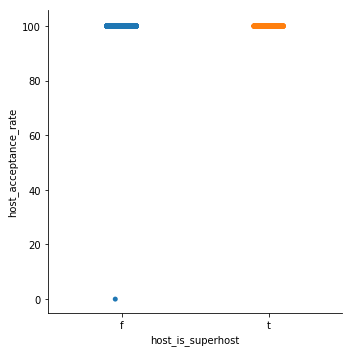

In [28]:
sns.catplot(x="host_is_superhost", y="host_acceptance_rate", data=list_final)

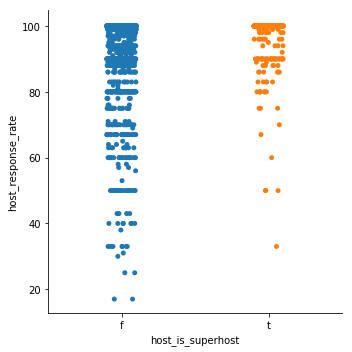

In [27]:
sns.catplot(x="host_is_superhost", y="host_response_rate", data=list_final)


       It seems that we can see that both types of hosts are open to everyone for acceptance, with one small outlier as a decline, but we see once we get to the response rate that Superhosts are far more likely to respons than non super hosts. This is important information to have, because it shows that many non-superhosts seem to do this infrequently enough that their response rates are affected. Knowing this, we would want to take good care of our superhosts, as they consisitently provide us with responses to those who wish to use AirBnB, postively affecting our relationship with our customers!
       
 # 4.4 What is the Relationship Between the Zipcodes of Seattle and Pricing?

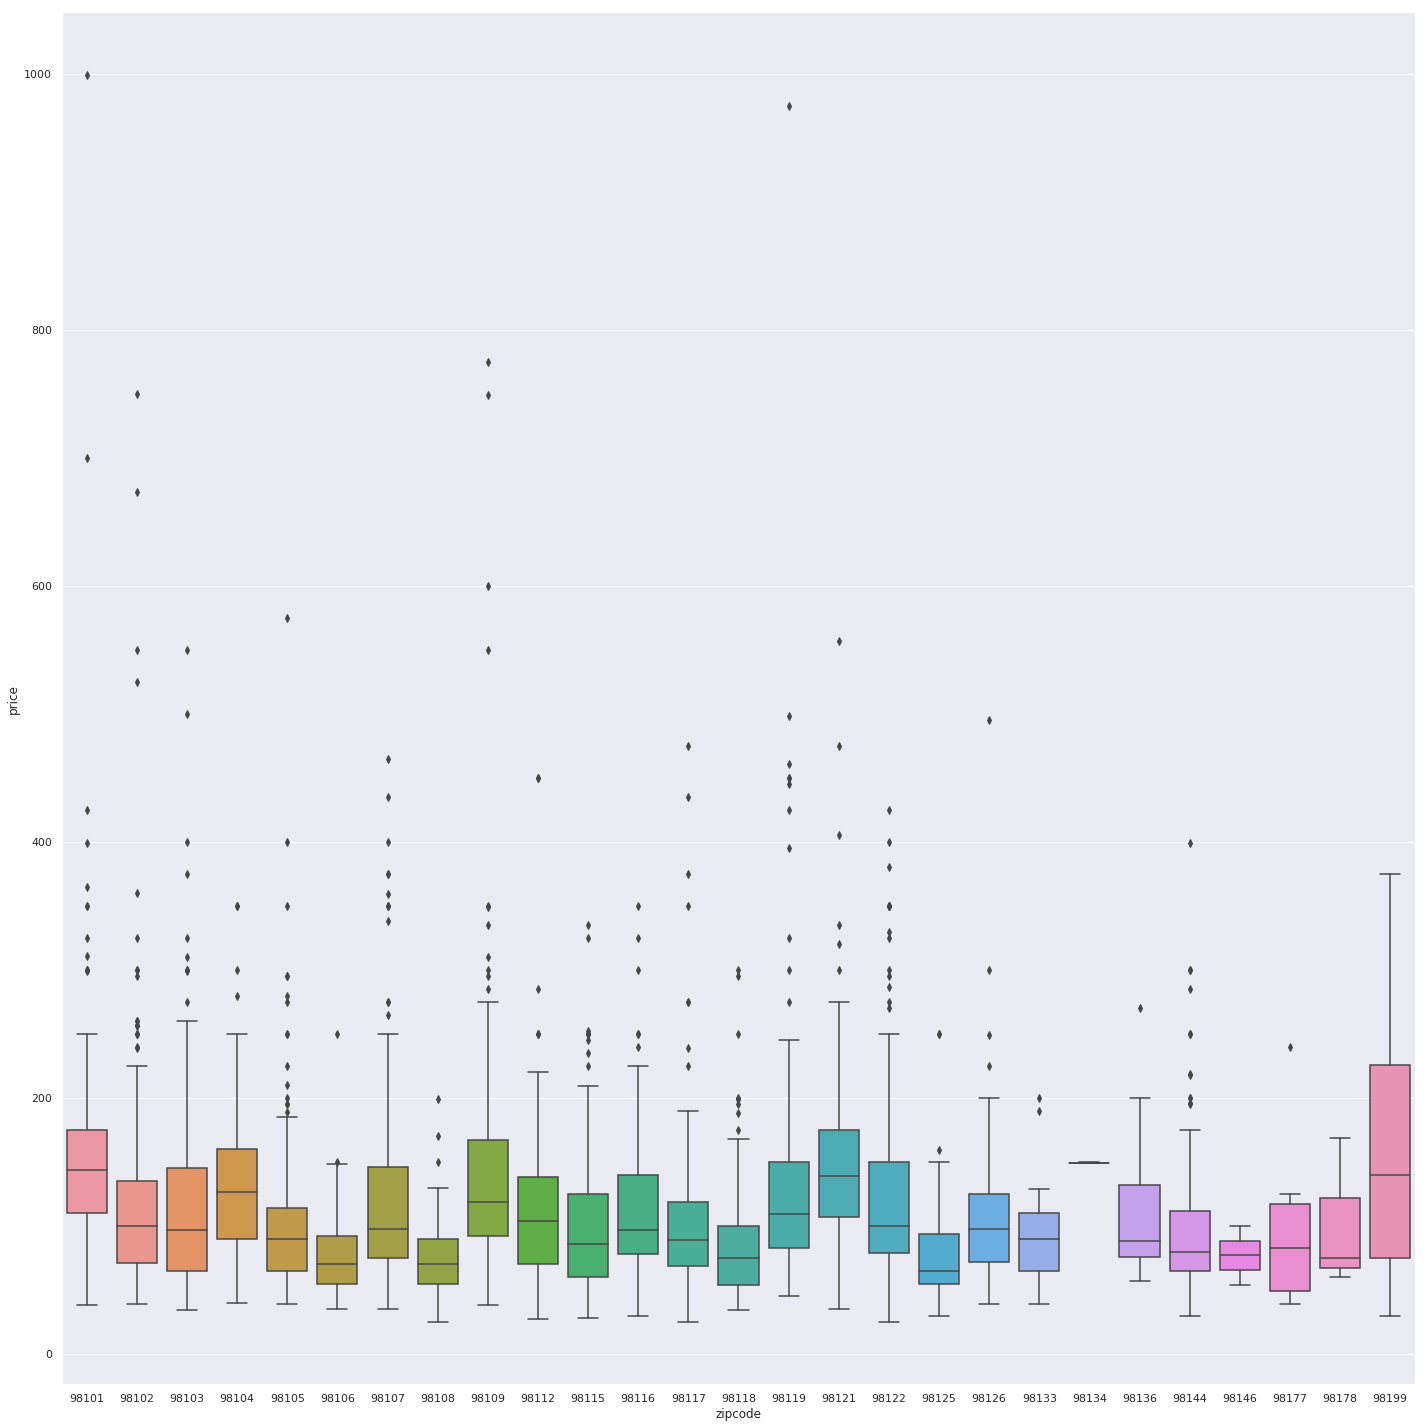

In [42]:
sns.catplot(x="zipcode", y="price", kind="box", data=list_final, height = 20);

     Here we see a good amount of data to work with, using a box plot, we can immdieatly pick out the oulietrs and this focus on long tails for our business problem. We are also aware of certain azipcodes with low counts from our data cleansing, such as 98177, 98134, 98178, 98146, which we will therefore be discounting in our analysis for lack of data. 
     What we can see clearly is that 98199, 98121 and 98108 have the longest stretching tails, with high reaching outliers and 98199 has by far the largest body. Using our business accumen, we could take this information and say that if there was one zipcode to concentrate our advertising to, it would be 98199, as there is a great range with high volume of expensive, high margin AirBnB's.
     
# 4.3 Relationships in the Review System

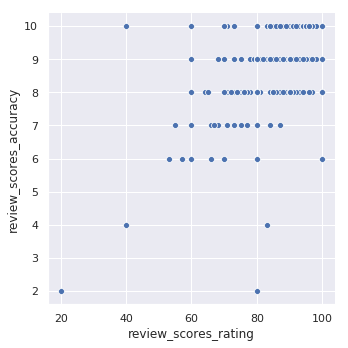

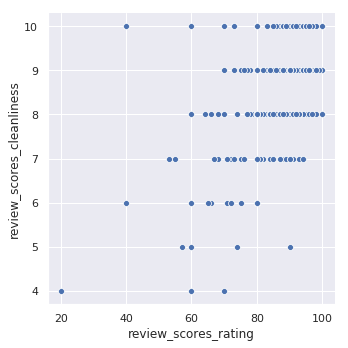

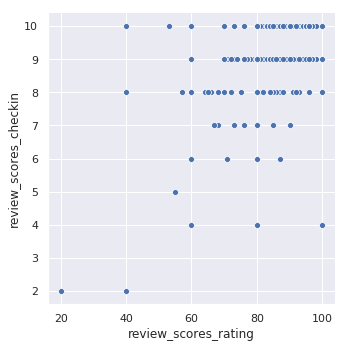

In [52]:
sns.relplot(x="review_scores_rating", y="review_scores_accuracy", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_cleanliness", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_checkin", data=list_final);


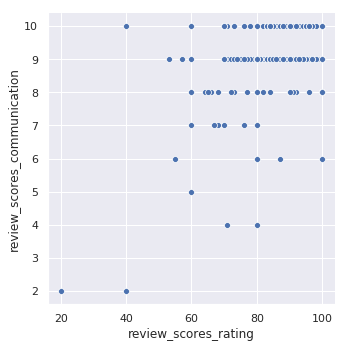

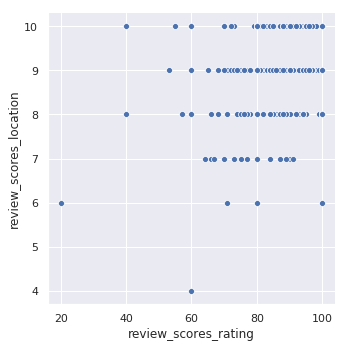

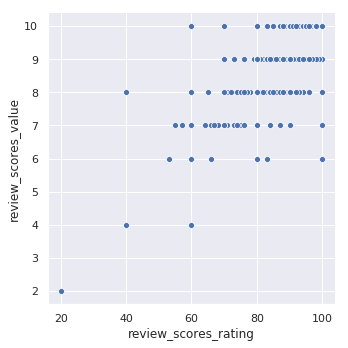

In [53]:
sns.relplot(x="review_scores_rating", y="review_scores_communication", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_location", data=list_final);
sns.relplot(x="review_scores_rating", y="review_scores_value", data=list_final);

    Within these six charts we can see several points of note. The biggest one to take away is how similar all the factors are to one anothers, suggesting that as AirBnB our system is working as intended. The second thing to take away is that cleanliness is the biggest difference in our scores, suggesting that cleaniless might be a contributing factor that we should investigate further, as it has been ranked the lowest the most consistently. It could be that the cleanliness of hosts has impacted our sales in the long run by contributing to less than high quality stays, which we would like to change, as the less than high quality stays will lead us to be looked at as a "cheap off brand" for hotels which is not the place we want to be in, espically if we are targeting those high price high margin zipcodes

# 5. Conclusion

     Our data analysis has been excellent, we have seen several business questions posed and answered, each with their own set of conclusions. Please read my blog post where I will document our final conclusions and take aways from today's data analysis!